<a href="https://colab.research.google.com/github/HaEunMok/ML/blob/main/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4%5D_decision_tree_%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0_(scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sklearn
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

# Decision Tree

## 1. classification

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [2]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [3]:
# 모델 학습
# ㅌX가 0일 때는 0, 1일 때는 1로 예측하는 모델 학습
clf= clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [4]:
# 예측
# 학습한 0과 1로만 결과가 산출
clf.predict([[2., 2.]])

array([1])

In [5]:
# 비율로 예측
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

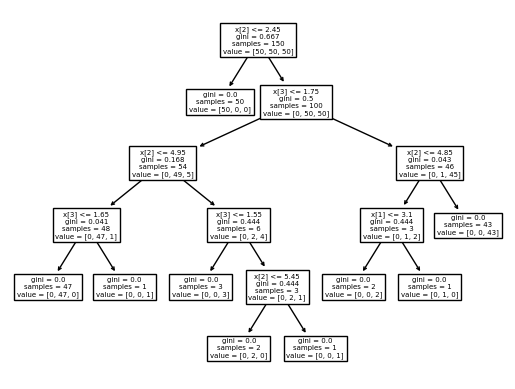

In [8]:
tree.plot_tree(clf)

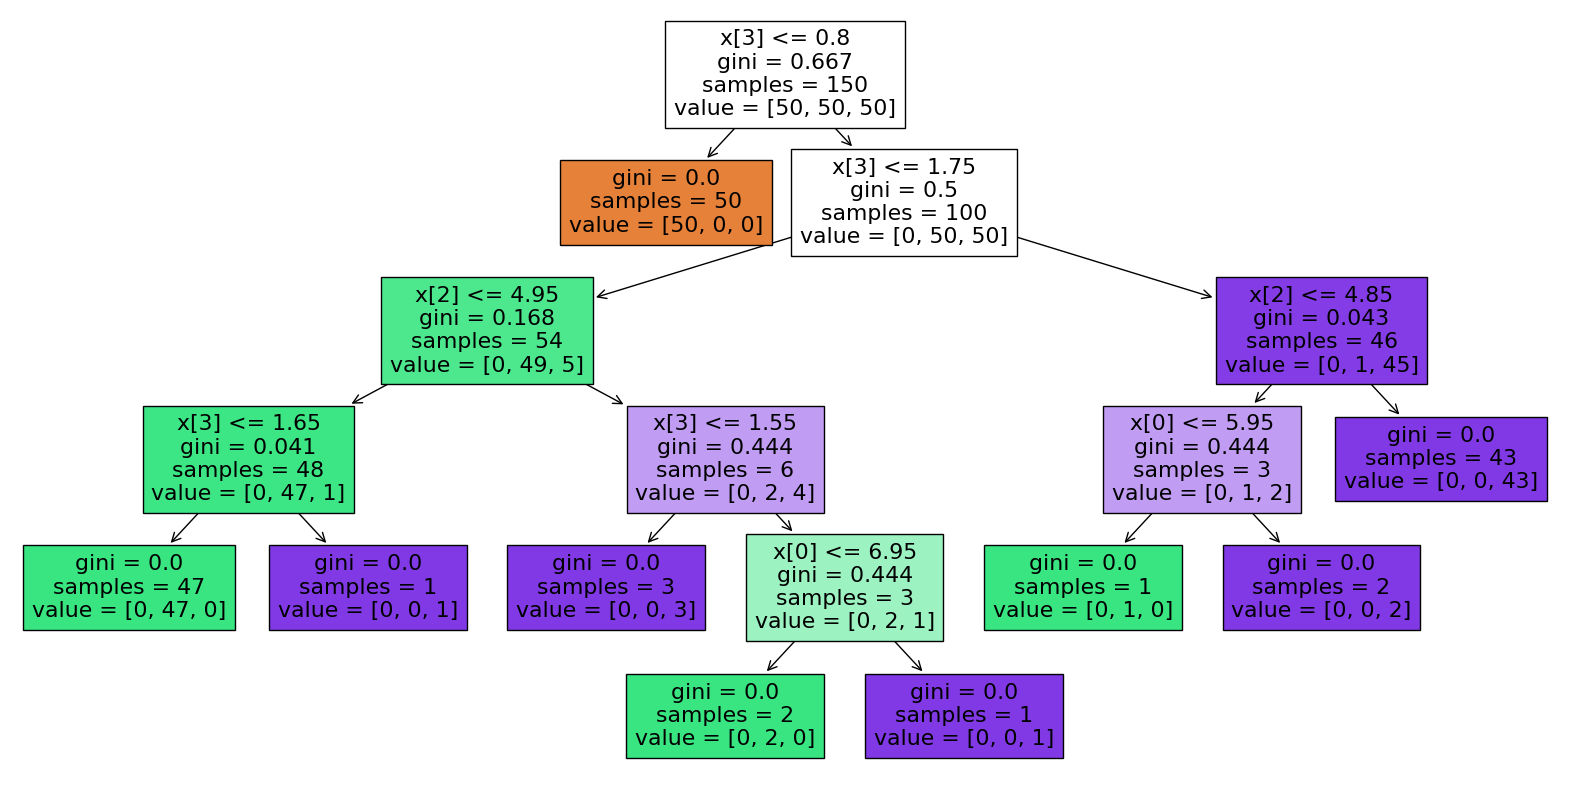

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
t=tree.plot_tree(clf.fit(X, y), filled=True)
#  filled 로 색 지정

## 2. 당뇨병 데이터셋을 이용한 의사결정나무 분류 모델 만들기




### 데이터

- pima 인디언들의 당뇨병에 대한 정보. 서구화된 식습관으로 인한 당뇨 데이터
- 당뇨병 여부를 예츨할 수 있는 데이터
- 숫자로만 이루어져 전처리가 필요하지 않음


Pregnancies : 임신 횟수

Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도

BloodPressure : 이완기 혈압 (mm Hg)

SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값

Insulin : 2시간 혈청 인슐린 (mu U / ml)

BMI : 체질량 지수 (체중kg / 키(m)^2)

DiabetesPedigreeFunction : 당뇨병 혈통 기능

Age : 나이

Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### 라이브러리 로드

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터셋 로드

In [11]:
df= pd.read_csv("/content/drive/MyDrive/ML DL/diabetes.csv")
df.shape

(768, 9)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 수치형 변수를 범주형 변수로 변경하기

In [13]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [37]:
df['Age_low']=df['Age']<25
df['Age_middle']=(df['Age']>=25) & (df['Age']<=60)
df['Age_high']=df['Age']>60
df[["Age","Age_low","Age_high"]].head()

,Age,Age_low,Age_high
0,50,False,False
1,31,False,False
2,32,False,False
3,21,True,False
4,33,False,False


<Axes: xlabel='Age_high', ylabel='count'>

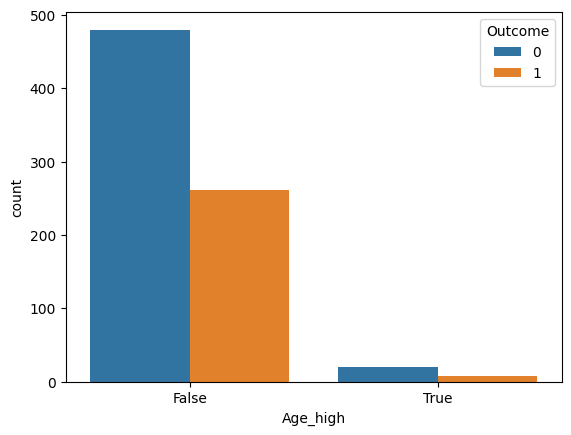

In [38]:
sns.countplot(data=df, x="Age_high", hue='Outcome')

### 학습, 예측 데이터 나누기

In [39]:
# 8:2 비율로 split. 학습데이터 : 테스트데이터 = 8:2
split_count = int(df.shape[0] * 0.8)
split_count

614

In [40]:
train = df[:split_count].copy()
train.shape

(614, 13)

In [41]:
test = df[split_count:].copy()
test.shape

(154, 13)

### 학습, 예측에 사용할 칼럼 추출

In [42]:
feature_names = train.columns.tolist()
#feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high']

### 예측 칼럼 추출

In [43]:
label_name = 'Outcome'
label_name

'Outcome'

## 학습, 예측 데이터셋 생성하기
- 학습데이터와 예측 데이터 행의 갯수가 일치하여야 한다

In [44]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 12)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Age_low,Age_middle,Age_high
0,6,148,72,35,0,33.6,0.627,50,False,False,True,False
1,1,85,66,29,0,26.6,0.351,31,False,False,True,False
2,8,183,64,0,0,23.3,0.672,32,True,False,True,False
3,1,89,66,23,94,28.1,0.167,21,False,True,False,False
4,0,137,40,35,168,43.1,2.288,33,False,False,True,False


In [45]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [46]:
X_test= test[feature_names]
print(X_test.shape)
X_test.head()

(154, 12)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Age_low,Age_middle,Age_high
614,11,138,74,26,144,36.1,0.557,50,True,False,True,False
615,3,106,72,0,0,25.8,0.207,27,False,False,True,False
616,6,117,96,0,0,28.7,0.157,30,False,False,True,False
617,2,68,62,13,15,20.1,0.257,23,False,True,False,False
618,9,112,82,24,0,28.2,1.282,50,True,False,True,False


In [47]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘 로드

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

### 학습

In [49]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 예측

In [50]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

# 시각화

## 트리 알고리즘

[Text(0.5691913439635535, 0.9705882352941176, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1856492027334852, 0.9117647058823529, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.03644646924829157, 0.8529411764705882, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.018223234624145785, 0.7941176470588235, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.009111617312072893, 0.7352941176470589, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.02733485193621868, 0.7352941176470589, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.018223234624145785, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03644646924829157, 0.6764705882352942, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.05466970387243736, 0.7941176470588235, 'BMI <= 9.8\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(0.

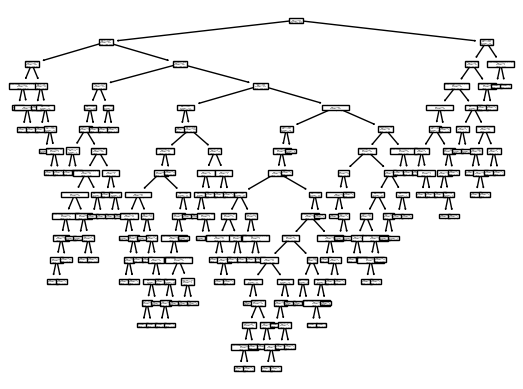

In [51]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

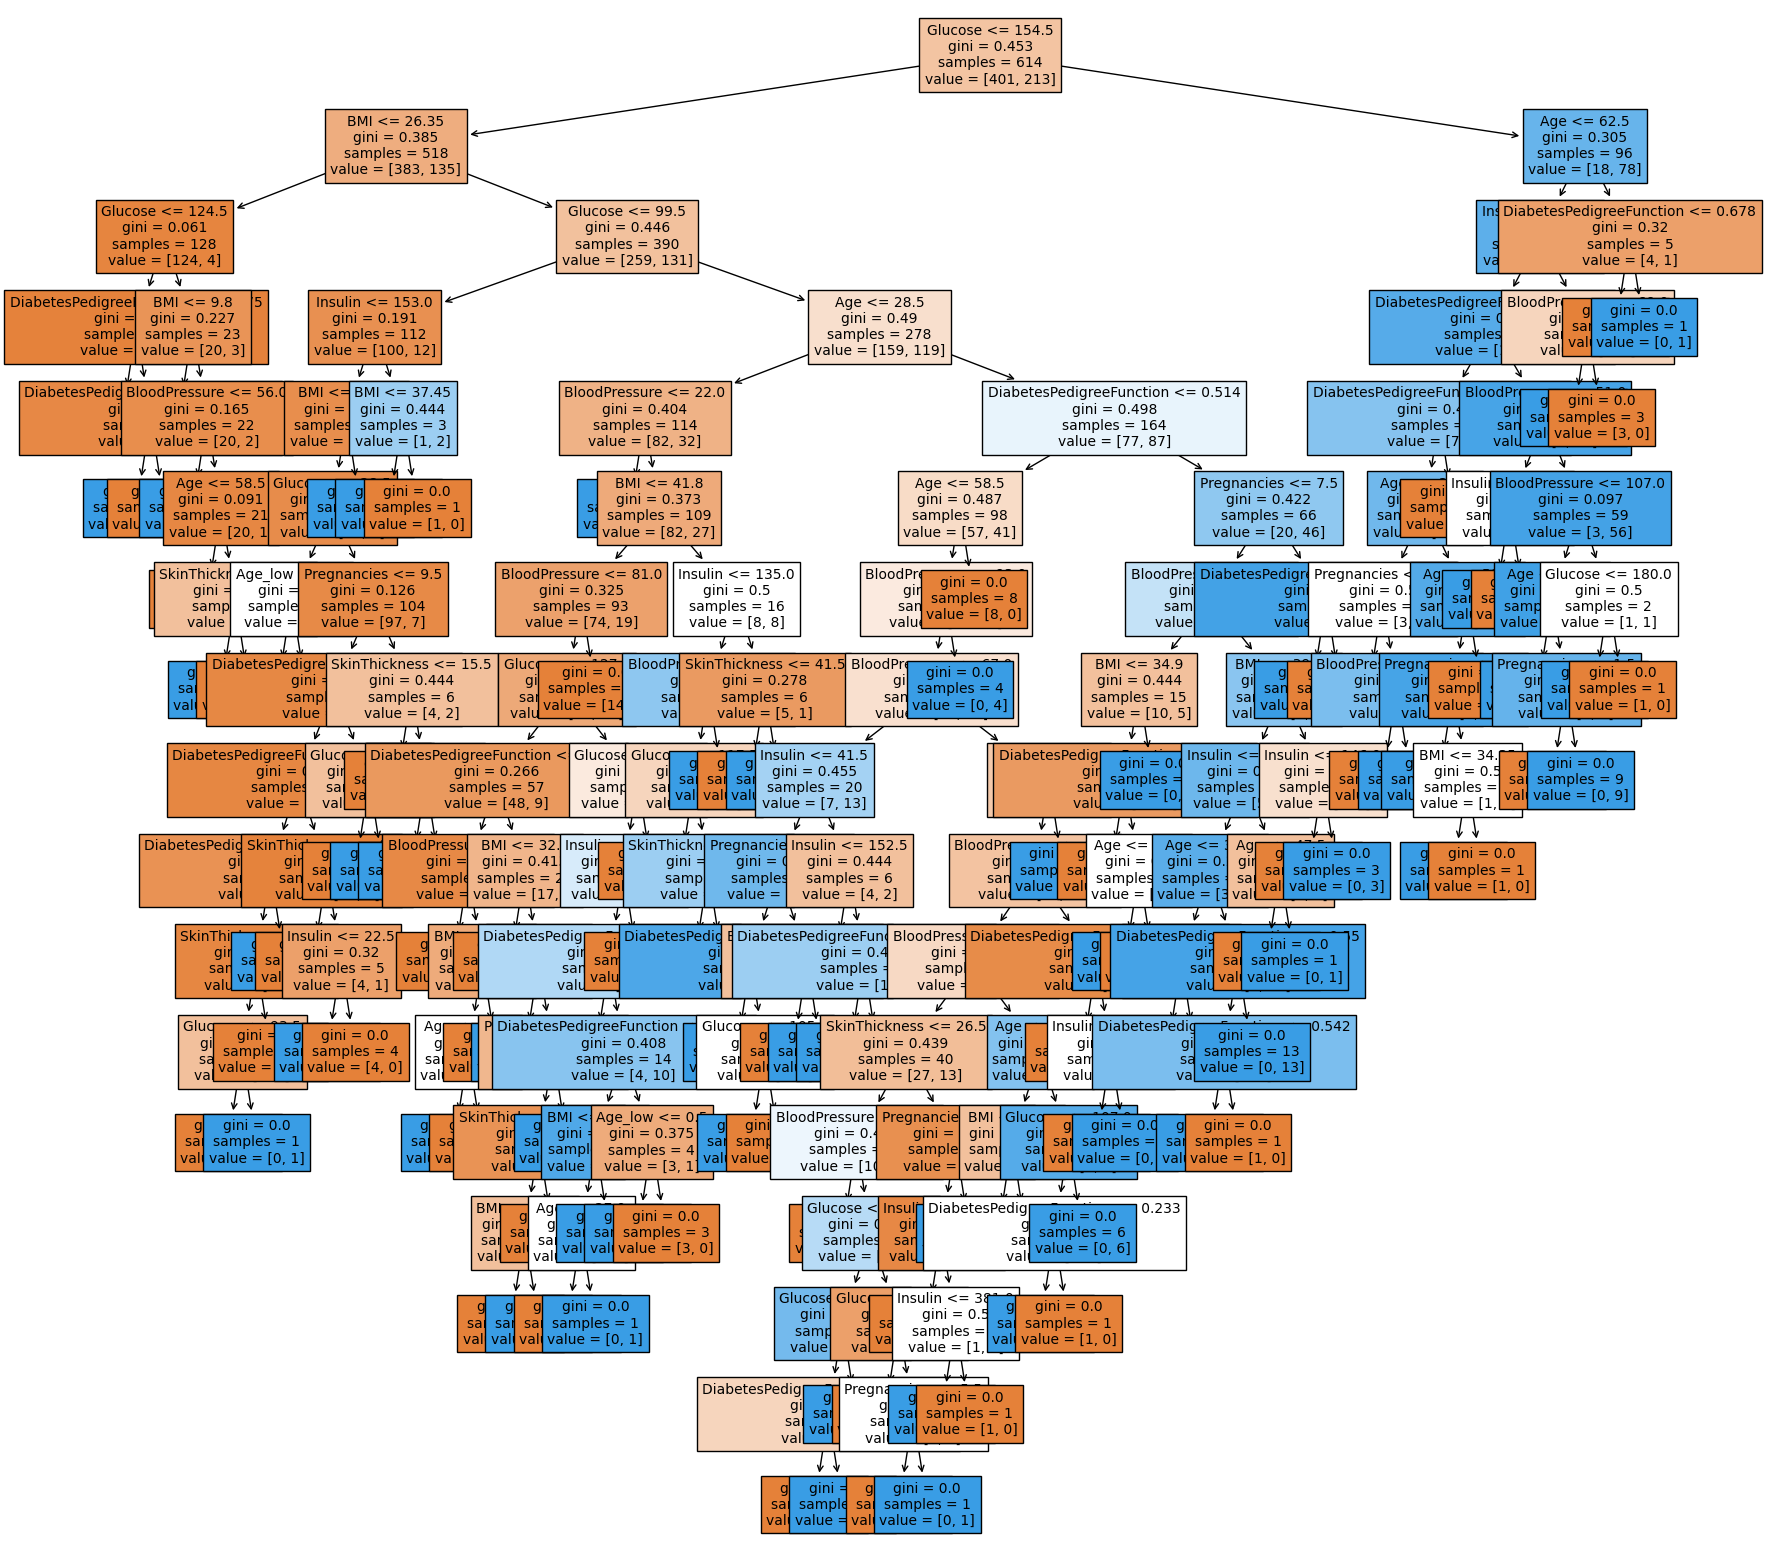

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names,
                           filled=True,
                           fontsize=10)

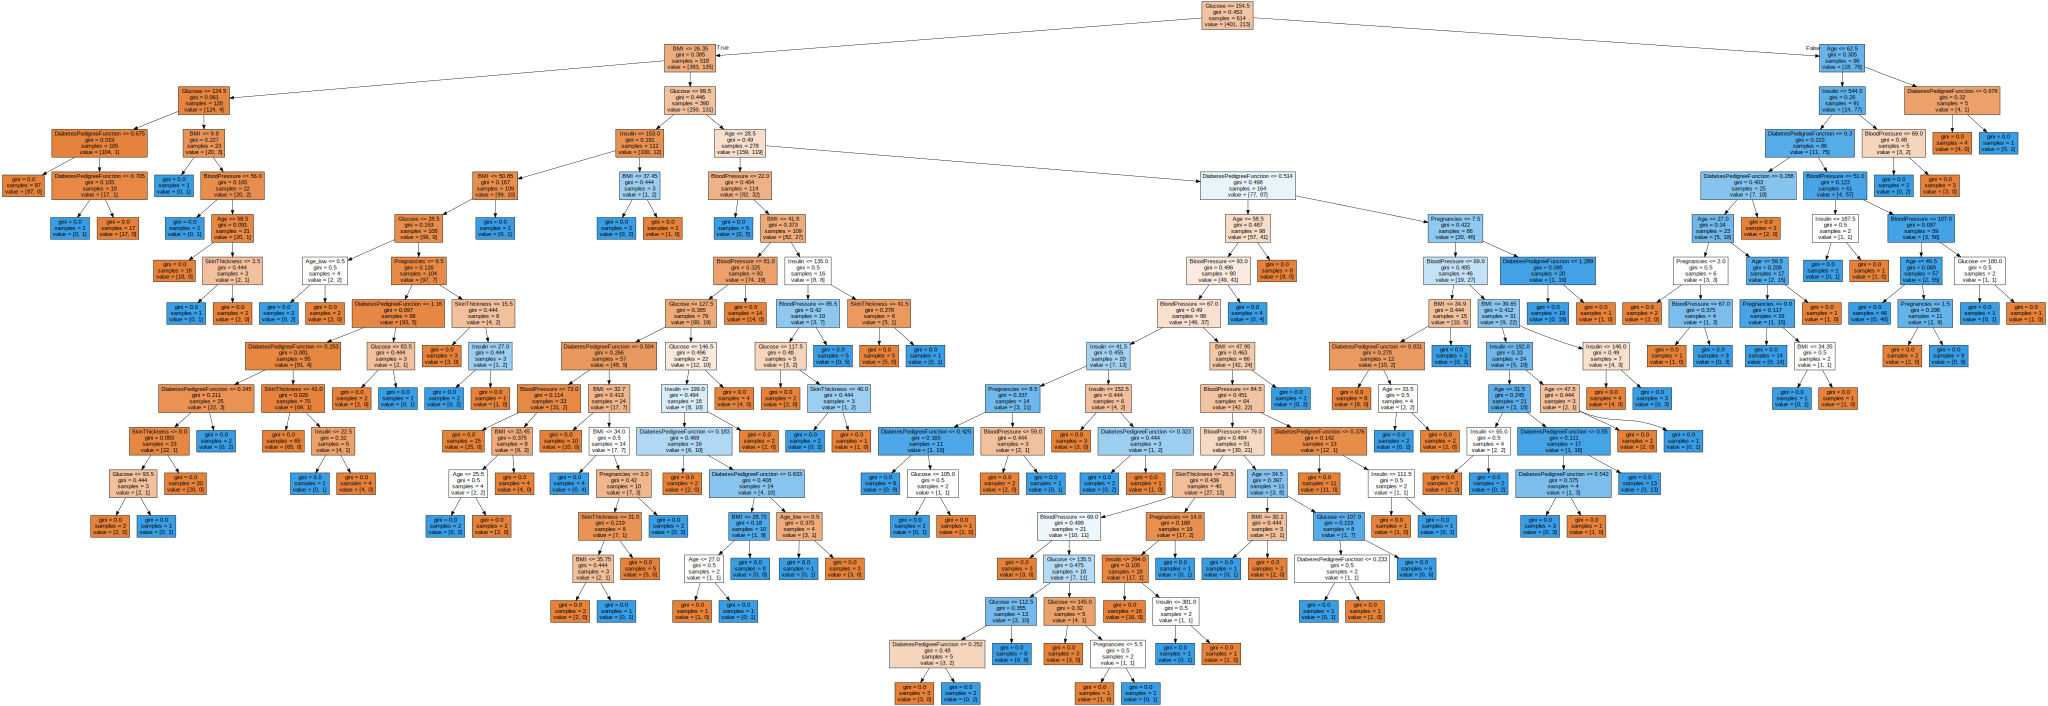

In [53]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

In [54]:
# 피처의 중요도 추충
model.feature_importances_

array([0.06083795, 0.30273307, 0.11797799, 0.03784559, 0.08734954,
       0.15265427, 0.12600524, 0.1020163 , 0.        , 0.01258005,
       0.        , 0.        ])

<Axes: >

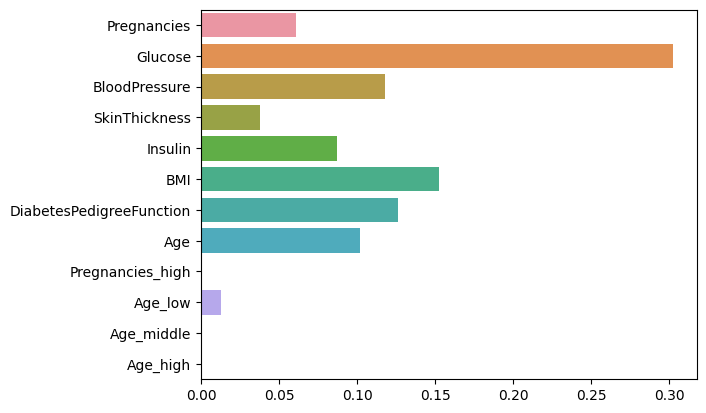

In [55]:
# 피처의 중요도 시각화
# 클루코스가 당뇨병 여부를 결정하는 핵심 피처이다.
sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도 예측하기

In [56]:
diff_count = abs(y_test - y_predict).sum()
diff_count

40

In [57]:
abs(y_test - y_predict).sum() / len(y_test) # 28% 잘못 예측했다

0.2597402597402597

In [58]:
(len(y_test) - diff_count) / len(y_test) * 100 # 71% 맞았다

74.02597402597402

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7402597402597403

In [60]:
model.score(X_test, y_test) * 100

74.02597402597402